# Implementation of the value iteration algorithm

This algorithm finds the optimal value function and policy given a
known model of the environment.

![img](../imgs/value-iteration.png)

From: Sutton and Barto, 2018. Ch. 4.

In [1]:
# first, import necessary modules
import sys
import gym
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('/Users/wingillis/dev/reinforcement-learning')

from collections import defaultdict
from lib.envs.gridworld import GridworldEnv
from lib.plotting import plot_gridworld_value_function

In [2]:
sns.set_style('white')

In [3]:
# initialize the environment
shape = (5, 5)  # size of the gridworld
env = GridworldEnv(shape, n_goals=2)
env.seed(23)
random.seed(23)

In [4]:
def value_iteration(env, gamma=1.0, theta=1e-5):
  '''
  Arguments:
    policy: a (n_state x n_action) matrix containing values between [0, 1]
    env: open.ai environment
    gamma: discount factor
    theta: convergence threshold
  '''
  
  def one_step_lookahead(state, V):
    '''calculate value of taking each action from this state'''
    actions = np.zeros(env.nA)
    for action in range(env.nA):
      # calculate action expectation
      for prob, next_state, reward, _ in env.P[state][action]:
        actions[action] += prob * (reward + gamma * V[next_state])
    return actions
      
  
  # initialize value function
  V = np.zeros(env.nS)
  
  # loop until the value function has converged
  while True:
    delta = 0  # amt of the largest state-value update
    # go through each state, update its value
    for state in range(env.nS):
      actions = one_step_lookahead(state, V)
      best_action_value = np.max(actions)
      delta = max(delta, np.abs(best_action_value - V[state]))
      # update the value function
      V[state] = best_action_value
      
    if delta < theta:
      break
      
  policy = np.zeros((env.nS, env.nA))
  for state in range(env.nS):
    actions = one_step_lookahead(state, V)
    best_action = np.argmax(actions)
    policy[state, best_action] = 1
  
  return policy, V

In [5]:
policy, V = value_iteration(env, gamma=0.75)

In [6]:
policy

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [7]:
V.reshape(shape)

array([[3.99997737, 2.99998303, 2.24998727, 1.68749045, 1.26561784],
       [2.99998303, 2.24998727, 1.68749045, 1.26561784, 1.68747737],
       [2.24998727, 1.68749045, 1.26561784, 1.68747737, 2.24997737],
       [1.68749045, 1.26561784, 1.68747737, 2.24997737, 2.99997737],
       [1.26561784, 1.68747737, 2.24997737, 2.99997737, 3.99997737]])

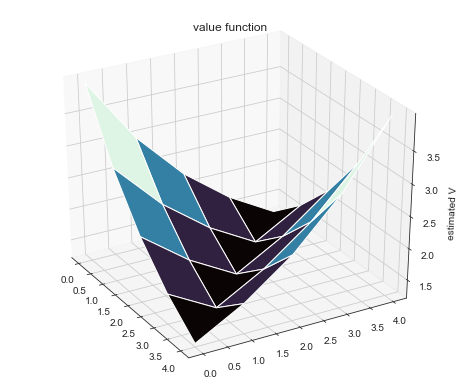

In [8]:
fig = plot_gridworld_value_function(V.reshape(shape))
fig.tight_layout()

In [59]:
print("grid policy (0=up, 1=right, 2=down, 3=left):")
print(np.argmax(policy, axis=1).reshape(shape))

grid policy (0=up, 1=right, 2=down, 3=left):
[[0 3 3 3 2]
 [0 0 0 0 2]
 [0 0 0 1 2]
 [0 0 1 1 2]
 [0 1 1 1 0]]
